<a href="https://colab.research.google.com/github/Shahbaazmohd/MLBaaz/blob/main/dogvision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!git clone https://github.com/Shahbaazmohd/MLBaaz.git

Cloning into 'MLBaaz'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), 145.67 KiB | 8.57 MiB/s, done.


# End-to-End Multi-class Dog Breed Classification

this notebook builds image classifier using TensorFlow 2.0 and TensorFlow Hub.

## 1. problem
identiying breed of a dog.

## 2. Data
from kaggle

## 3. Evaluation
a file with predictions probability for each dog of each test image.

## 4. Features
* we're dealing with images(unstructured data)
* 120 breed
* 10,000+ images in training set (have labels)
* 10,000+ images in test set (no labels, because we'll want to predict them.)

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive", timeout_ms=300000)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
# unzip uploaded data into google drive
#!unzip "/content/drive/MyDrive/vision/dog-breed-identification.zip" -d "/content/drive/MyDrive/vision/"

In [ ]:
# Import TF 2.x
try:
  # %tensorflow_version only exists in Colab
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow as tf
print("tf version: ",tf.__version__)

tf version:  2.15.0


# GET OUR WORKSPACE READY

In [ ]:
#import tensorflow into colab
import tensorflow as tf
import tensorflow_hub as hub
print("TF version: ",tf.__version__)
print("hub version: ",hub.__version__)

print("GPU", "available (YESS!!!)" if tf.config.list_physical_devices("GPU") else "not available")

TF version:  2.15.0
hub version:  0.16.1
GPU available (YESS!!!)


## getting data ready(tuing into tensors)
tuning our images into numerical representations

In [ ]:
# checkout the labels of our family
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/vision/labels.csv")
print(labels_csv.head())
print(labels_csv.describe())

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever
                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126


In [ ]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
labels_csv["breed"].value_counts()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
komondor                 67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

<Axes: xlabel='breed'>

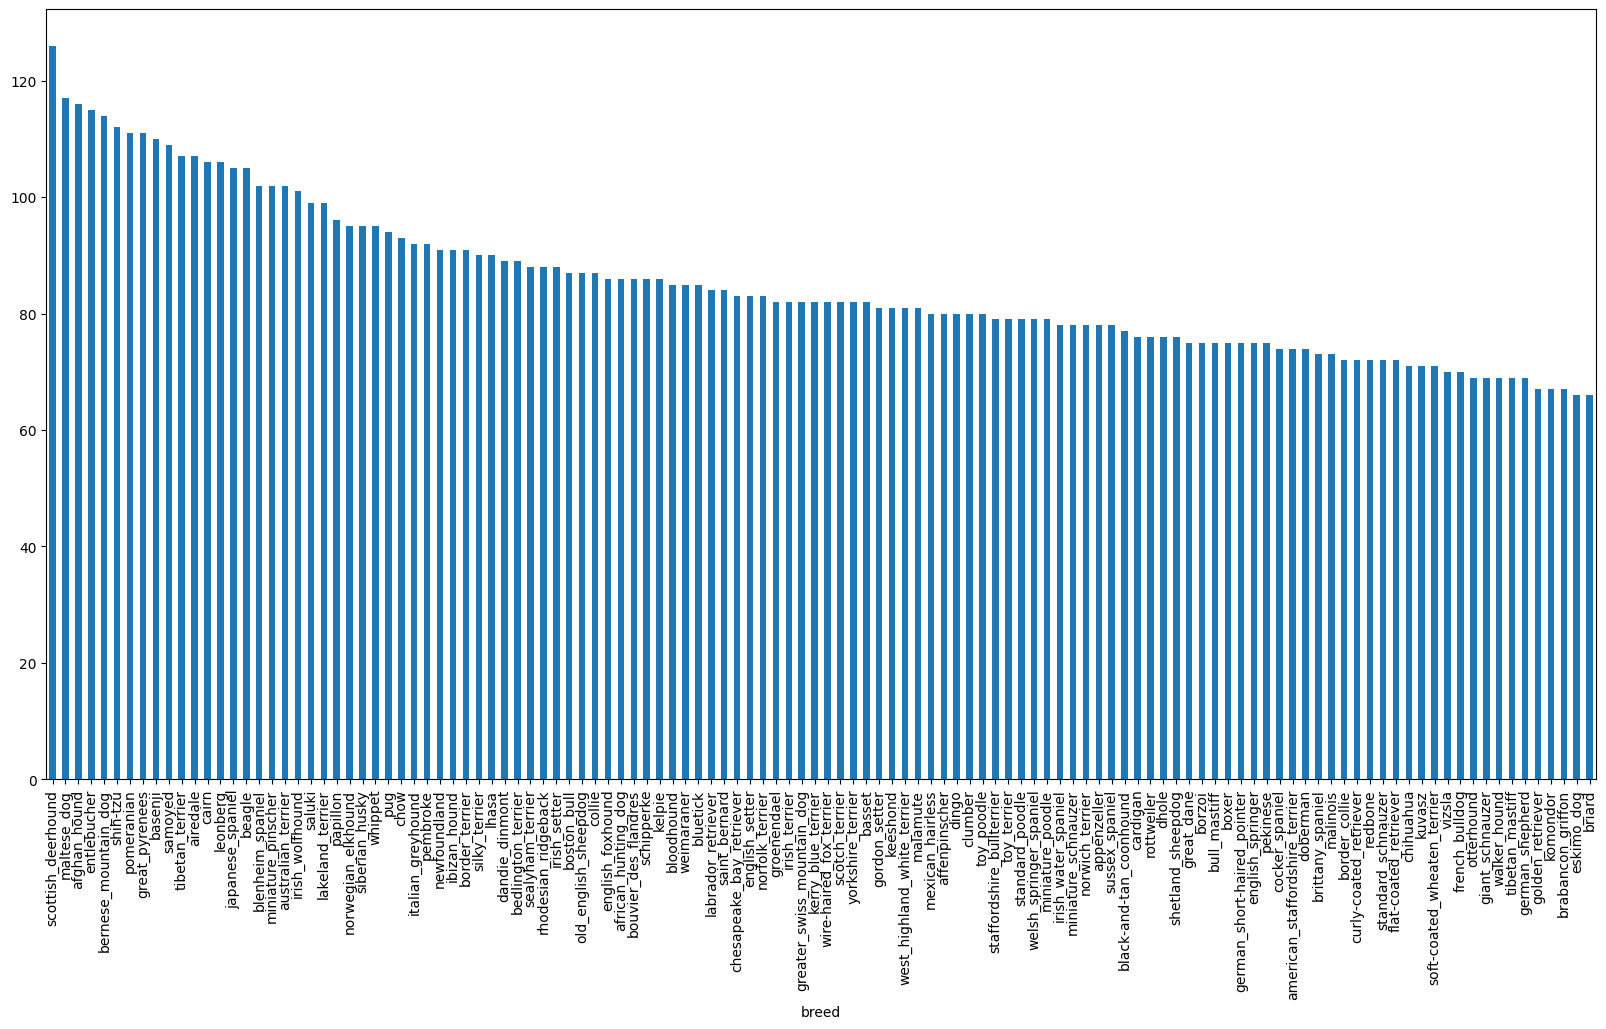

In [ ]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

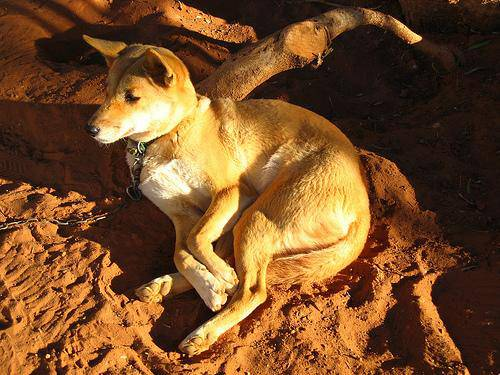

In [ ]:
# view an image
from IPython.display import Image
Image("/content/drive/MyDrive/vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### getting images and their labels

In [ ]:
print(labels_csv.head())

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
# create pathnames from image ID's
filenames = [fname for fname in labels_csv["id"]]
filenames[:10]

['000bec180eb18c7604dcecc8fe0dba07',
 '001513dfcb2ffafc82cccf4d8bbaba97',
 '001cdf01b096e06d78e9e5112d419397',
 '00214f311d5d2247d5dfe4fe24b2303d',
 '0021f9ceb3235effd7fcde7f7538ed62',
 '002211c81b498ef88e1b40b9abf84e1d',
 '00290d3e1fdd27226ba27a8ce248ce85',
 '002a283a315af96eaea0e28e7163b21b',
 '003df8b8a8b05244b1d920bb6cf451f9',
 '0042188c895a2f14ef64a918ed9c7b64']

In [ ]:
filenames = ["drive/MyDrive/vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]
filenames[:10]

['drive/MyDrive/vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("drive/MyDrive/vision/train/")) == len(filenames):
  print("Filenames match actual amount of files!")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!


In [ ]:
#filenames = os.listdir(directory)[:9000]
#filenames

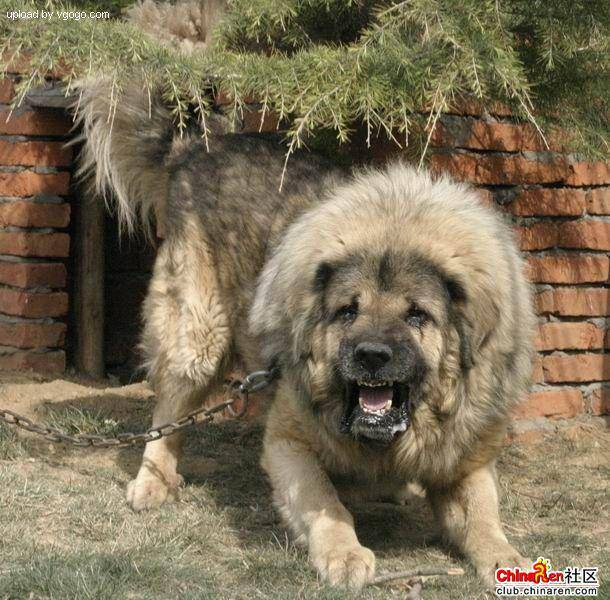

In [ ]:
Image(filenames[9000])

In [ ]:
labels_csv["id"][9000]

'e20e32bf114141e20a1af854ca4d0ecc'

In [ ]:
labels_csv["breed"][9000]

'tibetan_mastiff'

since we've got our training images filepaths in a list, let's prepare our labels.

In [ ]:
import numpy as np
labels = labels_csv["breed"] #labels = labels_csv["breed"].to_numpy() dont write next line if using this
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# see if numbers of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames")
else:
  print("Number of labels does not match number of filenames, check data directories")

Number of labels matches number of filenames


In [ ]:
# find unique label values
unique_breeds = np.unique(labels)
unique_breeds, len(unique_breeds)

(array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
        'american_staffordshire_terrier', 'appenzeller',
        'australian_terrier', 'basenji', 'basset', 'beagle',
        'bedlington_terrier', 'bernese_mountain_dog',
        'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
        'bluetick', 'border_collie', 'border_terrier', 'borzoi',
        'boston_bull', 'bouvier_des_flandres', 'boxer',
        'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
        'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
        'chow', 'clumber', 'cocker_spaniel', 'collie',
        'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
        'doberman', 'english_foxhound', 'english_setter',
        'english_springer', 'entlebucher', 'eskimo_dog',
        'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
        'german_short-haired_pointer', 'giant_schnauzer',
        'golden_retriever', 'gordon_setter', 'gre

In [ ]:
# turns a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# turns every label into an array of booleans
boolean_labels = [label==unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# example: turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) #index where label occurs
print(boolean_labels[0].argmax()) # index where label occures in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
filenames[:10]

['drive/MyDrive/vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

### creating our own validation set
since dataset from kaggle doesn't come with validation set, we're going to create our own

In [ ]:
# setup x and y variables
X = filenames
y = boolean_labels

In [ ]:
# set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)
len(X_train),len(y_train), len(X_val),  len(y_val)

(800, 800, 200, 200)

In [ ]:
X_train[:5], y_train[:2]

(['drive/MyDrive/vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
      

Preprocessing Images (turning images into tensors)

to preprocess our image into tensorflow we're going to write a function which does a few things:
1. Take an image filepath as input.
2. Use tensorflow to read the file and save it to a variable 'image'.
3. Turn 'image' into tensors
4. Normalize our image (convert the colour channel values from 0-255 to 0-1 values)
5. Resize the 'image' to be a shape of (224,224)
6. Return the modified 'image'

https://www.tensorflow.org/tutorials/load_data/images

In [ ]:
# convert image to numpy
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  51],
        [ 97,  88,  47],
        [120, 111,  70]]], dtype=uint8)
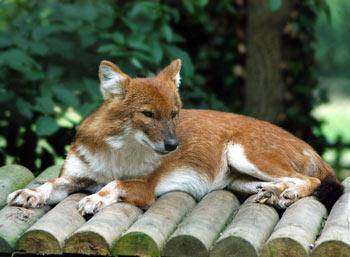

In [ ]:
image

In [ ]:
image.max(), image.min()

(255, 0)

In [ ]:
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  5

Let's make a function to preprocess it.

In [ ]:
# define image size
IMG_SIZE = 224

# create function for preprocessing images
#def process_image(image_path, img_size=IMG_SIZE):
  #"""
  #Takes an image file path and turns it into a tensor
  #"""
  # read in image file
  #image = tf.io.read_file(image_path)
  # turn the jpeg image into numerical tensor with 3 colour channels (Red,Green, Blue)
  #image = tf.image.decode_jpeg(image, channels=3)
  # convert the colour channel values from 0-255 to 0-1 values
  #image = tf.image.convert_image_dtype(image, tf.float32)
  # resize the image to our desired size (224, 224)
  #image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  #return image
import tensorflow as tf

def process_image(image_path):
    """
    Processes an image path into a tensor.
    """
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])
    image = image / 255.0  # Normalize to [0,1] range
    return image

# preprocessing images (turning datainto batches)

yann lecun batch size.

jeremy howard batch size

What's a batch?

A batch (also called mini-batch) is a small portion of your data, say 32 (32 is generally the default batch size) images and their labels. In deep learning, instead of finding patterns in an entire dataset at the same time, you often find them one batch at a time.

Let's say you're dealing with 10,000+ images (which we are). Together, these files may take up more memory than your GPU has. Trying to compute on them all would result in an error.

Instead, it's more efficient to create smaller batches of your data and compute on one batch at a time.

In [ ]:
# create a simple function to return a tuple (image, label)
#def get_image_label(image_path):
  #"""
  #Takes an image file path and the associated label,
  #process the image and return a tuple of (image, label)
  # """
  #image = process_image(image_path)
  #return image, label
def get_image_label(image_path, label):
    """
    Processes an image path into a tensor and returns the image with its label.
    """
    image = process_image(image_path)
    return image, label

In [ ]:
# Demo of the above
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.32641777, 0.5222886 , 0.3232816 ],
         [0.25371668, 0.44366494, 0.24117756],
         [0.2569976 , 0.44670868, 0.23893748],
         ...,
         [0.29325104, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903141, 0.45378068, 0.27294812],
         [0.24375683, 0.44070187, 0.2554778 ],
         [0.28389847, 0.4721338 , 0.28298813],
         ...,
         [0.2785345 , 0.50279915, 0.3100471 ],
         [0.28428745, 0.5108718 , 0.32523632],
         [0.28821915, 0.5148035 , 0.32916805]],
 
        [[0.20941192, 0.4069295 , 0.25792548],
         [0.24045376, 0.43900943, 0.28689107],
         [0.29001114, 0.47937486, 0.32247737],
         ...,
         [0.26074055, 0.48414767, 0.30125177],
         [0.27101526, 0.49454466, 0.32096273],
         [0.27939945, 0.50292885, 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442047

now we've got a way to turn our data into tuples of tensores in the form: (image, label), let's make afunction to turn all ofour data (X & y) into batches

In [ ]:
# Define batch size
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    """
    Creates batches of data out of image (X) and label (y) pairs.
    Shuffles the data if it's training data but doesn't shuffle if it's validation data.
    Also accepts test data as input (no labels).
    """

    # If data is test dataset, we probably don't have labels
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))  # Only filepaths
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch

    # If the data is a validation dataset, we don't need to shuffle it
    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    else:
        print("Creating training data batches...")
        # Turn filepaths and labels into tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
        # Shuffle data
        data = data.shuffle(buffer_size=len(X))
        # Turn data into batches
        data = data.map(get_image_label) #.batch(BATCH_SIZE)
        data_batch = data.batch(BATCH_SIZE)
        return data_batch


In [ ]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
# check out the difference attributesofour data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

# Visualizing our data

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

In [ ]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
len(train_images), len(train_labels)

(32, 32)

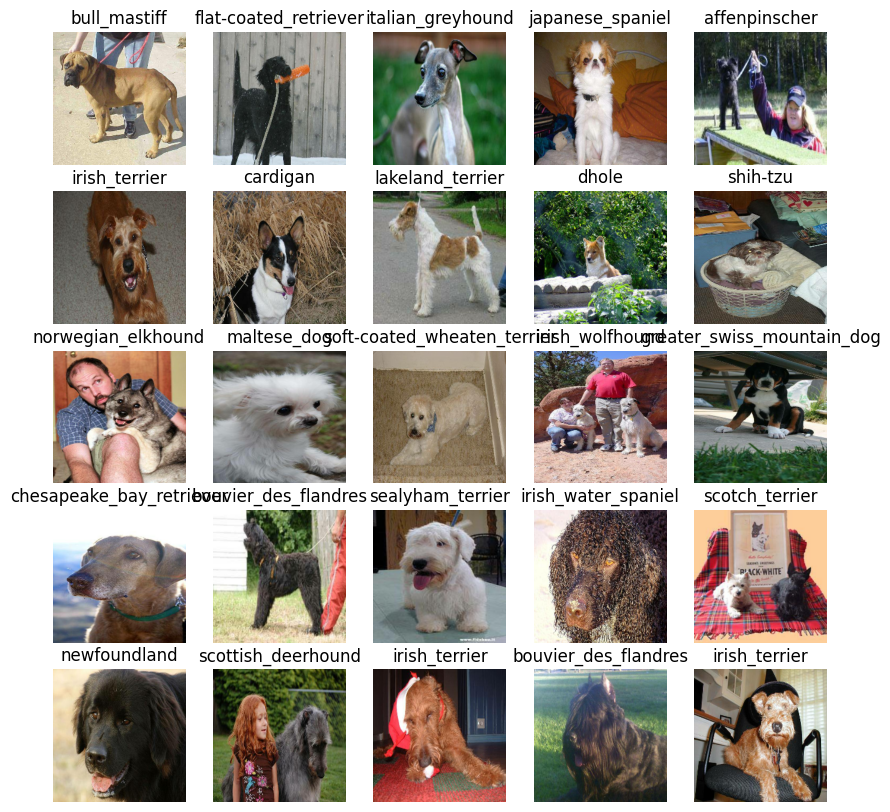

In [ ]:
show_25_images(train_images, train_labels)

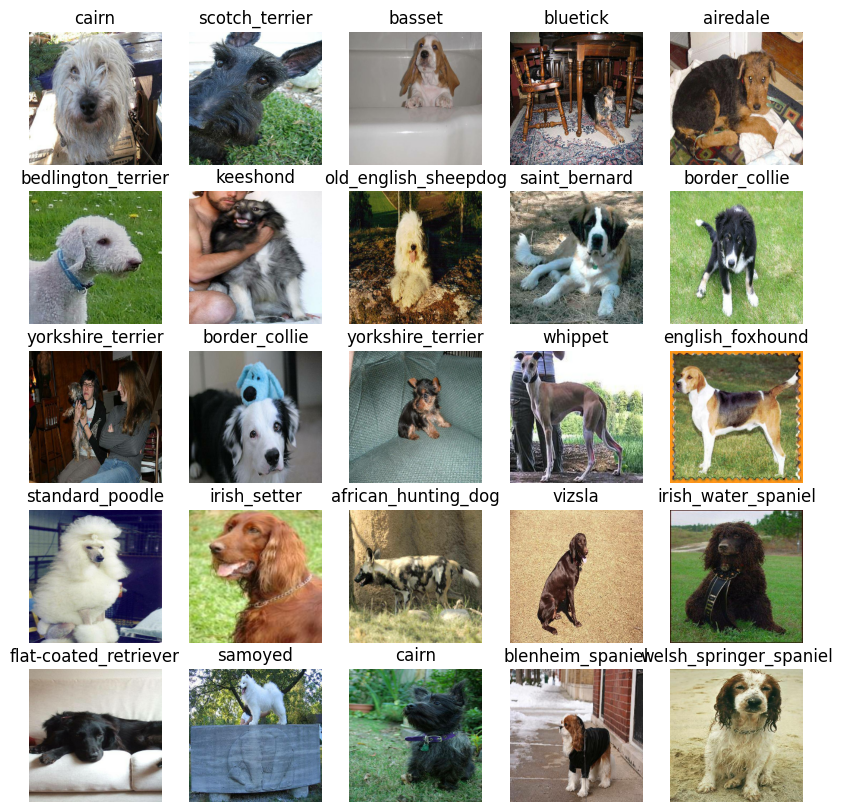

In [ ]:
# Visualize validation images from the validation data batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

# building our models
preparing our inputs and outputs

Creating and training a model
Now our data is ready, let's prepare it modelling. We'll use an existing model from TensorFlow Hub.

TensorFlow Hub is a resource where you can find pretrained machine learning models for the problem you're working on.

Using a pretrained machine learning model is often referred to as transfer learning.

Why use a pretrained model?
Building a machine learning model and training it on lots from scratch can be expensive and time consuming.

Transfer learning helps eliviate some of these by taking what another model has learned and using that information with your own problem.

How do we choose a model?
Since we know our problem is image classification (classifying different dog breeds), we can navigate the TensorFlow Hub page by our problem domain (image).

We start by choosing the image problem domain, and then can filter it down by subdomains, in our case, image classification.

Doing this gives a list of different pretrained models we can apply to our task.

Clicking on one gives us information about the model as well as instructions for using it.

For example, clicking on the mobilenet_v2_130_224 model, tells us this model takes an input of images in the shape 224, 224. It also says the model has been trained in the domain of image classification.

Before we build a model, there are a few things we need to define:

* The input shape (images, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use.


FROM TENSORLOW HUB

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4"

tensorflow keras.

sequential API and functional API

-----------------------------------------


In [ ]:
# create a function which builds a keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # setup the model layers
  model= tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL),
      tf.keras.layers.Dense(OUTPUT_SHAPE, activation="softmax") #layer 2(output layer)
  ])

  # compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # build the model
  model.build(INPUT_SHAPE)

  return model

# google these

mobile net v2 architecture?,
convolutional neural network,
overall archutecture,
softmax function, adam optimizer,
types of ML model optimizers,
what loss function should i use?,
tf keras metrics,
imagenet,


In [ ]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 120)               153720    
                                                                 
Total params: 2411704 (9.20 MB)
Trainable params: 153720 (600.47 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


# creating callbacks

callbacks are helper functions a model can use during training to do such thins as save its progress, check its progress or stop training early if a model stops moving.

we'll create two callbacks, one for TensorBoard which helps track our model and other for early stopping which prevents our model from training for too long.

### TensorBoard Calling

to setup a TensorBoard callback, we need to do 3 things:
1. load the TensorBoard notebook extension.
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's fit() function.
3. Visualize our model training logs with the %tensorboard magic function (will do this after model training)

In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # create a log directory for storing TensorBoard logs
  log_dir = os.path.join("drive/MyDrive/vision/logs",
                         # make it so the logs get tracked whenever we run an experiment
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(log_dir)

 Early Stopping Callback

 early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving

In [ ]:
# Early Stopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                    patience=3)

# training our deep neural network (training a model)

our first model is going to train 1000 images to make sure everything is working

In [ ]:
NUM_EPOCH = 100 #@param {type:"slider", min:10, max:100, step:10}

In [ ]:
print("GPU", "available (YESS!!!)" if tf.config.list_physical_devices("GPU") else "not available")

GPU available (YESS!!!)


Let's create a simple function which trains a model. The function will:

* Create a model using create_model().
* Setup a TensorBoard callback using create_tensorboard_callback() (we do this here so it creates a log directory of the current date and time).
* Call the fit() function on our model passing it the training data, validatation data, number of epochs to train for and the callbacks we'd like to use.
* Return the fitted model.

In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCH,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])

  return model

In [ ]:
# -----------------------------------------------------------------------------------------------------------------------------------------1
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4
Epoch 1/100
25/25 [==============================] - 320s 13s/step - loss: 4.3254 - accuracy: 0.1275 - val_loss: 3.3116 - val_accuracy: 0.3150
Epoch 2/100
25/25 [==============================] - 4s 142ms/step - loss: 1.7267 - accuracy: 0.7400 - val_loss: 2.1087 - val_accuracy: 0.5500
Epoch 3/100
25/25 [==============================] - 5s 201ms/step - loss: 0.7276 - accuracy: 0.9325 - val_loss: 1.6107 - val_accuracy: 0.6250
Epoch 4/100
25/25 [==============================] - 5s 220ms/step - loss: 0.3730 - accuracy: 0.9850 - val_loss: 1.4254 - val_accuracy: 0.6600
Epoch 5/100
25/25 [==============================] - 4s 162ms/step - loss: 0.2346 - accuracy: 0.9937 - val_loss: 1.3450 - val_accuracy: 0.6950
Epoch 6/100
25/25 [==============================] - 4s 163ms/step - loss: 0.1650 - accuracy: 0.9975 - val_loss: 1.2916 - val_accuracy: 0.6900
Epoch 7/100
25/25 [==============================

QUESTION: its looks like our model is overfitting because it's performance far better on the training datasets than validation datasets, what are some ways toprevent modeloverfitting in deep learning neural networks?

NOTE: overfitting to begin with is a good thing! it means our model us learnong!!!

### checking the TensorBoard logs

the tensorboard magic function (%tensorboard) will access the logs directory we created earlier and visualize its contents

In [ ]:
# ---------------------------------------------------------------------------------------------------------------------2
#%tensorboard --logdir /content/drive/MyDrive/vision/logs

# making and evaluating predictions using a trained model

In [ ]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# -------------------------------------------------------------------------------------------------------------------
# make prediction on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
#predictions

7/7 [==============================] - 1s 98ms/step


In [ ]:
# ============================================================================================================================================
#predictions[0] # np.sum(predictions[0]), len(predictions[0])

In [ ]:
# ============================================================================================================================================
#np.sum(predictions[1])

In [ ]:
# ============================================================================================================================================
# first predictions
#index = 112 #0-120
#print(predictions[index])
#print(f"Max value(probability of predictions): {np.max(predictions[index])}")
#print(f"Sum: {np.sum(predictions[index])}")
#print(f"Max index: {np.argmax(predictions[index])}")
#print(f"Prediction: {unique_breeds[np.argmax(predictions[index])]}")

In [ ]:
#unique_breeds[36]

having the above functionalities is great but we want to be able to do it at scale.
and it would be eveen better if we could see the image the prediction is being made on!

**Note**: Prediciton probabilities are also know as **confidence levels**

In [ ]:
# ==================================================================================================================================================
#turn Prediciton probabilitiesinto their respective label (easierto understand)
def get_pred_label(prediciton_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediciton_probabilities)]

# get a predicted label based on array of prediciton probabilities
pred_label = get_pred_label(predictions[36])
pred_label

'welsh_springer_spaniel'

now since our validation data is still batch dataset, we'll have to unbatchify it to make predictions on the validation images and then compare those predictions to the validation labels (truth labels)

In [ ]:
# create a function to unbatchify  a batch dataset
def unbatchify(data):
  """
  Turns batches of data into single arrays.
  """
  images = []
  labels = []
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284866, 0.30566907],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934893],
         ...,
         [0.7761433 , 0.82320213, 0.8101595 ],
         [0.8129115 , 0.828535  , 0.84069437],
         [0.8209296 , 0.82637364, 0.8423667 ]],
 
        [[0.23448707, 0.31603682, 0.19543912],
         [0.3414841 , 0.3656084 , 0.27241895],
         [0.45016074, 0.40117088, 0.33964604],
         ...,
         [0.76639867, 0.81341374, 0.8135083 ],
         [0.73042476, 0.75012016, 0.7659072 ],
         [0.74518913, 0.7600257 , 0.7830808 ]],
 
        [[0.30157742, 0.30825868, 0.2101833 ],
         [0.29059538, 0.27066192, 0.18401103],
         [0.4138316 , 0.36170745, 0.29640046],
         ...,
         [0.7987162 , 0.84185344, 0.8606442 ],
         [0.79577374, 0.82859933, 0.8605654 ],
         [0.7518163 , 0.7790497 , 0.8155255 ]],
 
        ...,
 
        [[0.97467786, 0.9878955 , 0.9342279 ],
         [0.9915305 , 0.99772066, 0.94278

In [ ]:
get_pred_label(val_labels[0])

'affenpinscher'

In [ ]:
image_ = []
labels_ = []

# loop through unbatch data
for image, label in val_data.unbatch().as_numpy_iterator():
  image_.append(image)
  labels_.append(label)

image_[0], labels_[0]

(array([[[0.29599646, 0.43284866, 0.30566907],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934893],
         ...,
         [0.7761433 , 0.82320213, 0.8101595 ],
         [0.8129115 , 0.828535  , 0.84069437],
         [0.8209296 , 0.82637364, 0.8423667 ]],
 
        [[0.23448707, 0.31603682, 0.19543912],
         [0.3414841 , 0.3656084 , 0.27241895],
         [0.45016074, 0.40117088, 0.33964604],
         ...,
         [0.76639867, 0.81341374, 0.8135083 ],
         [0.73042476, 0.75012016, 0.7659072 ],
         [0.74518913, 0.7600257 , 0.7830808 ]],
 
        [[0.30157742, 0.30825868, 0.2101833 ],
         [0.29059538, 0.27066192, 0.18401103],
         [0.4138316 , 0.36170745, 0.29640046],
         ...,
         [0.7987162 , 0.84185344, 0.8606442 ],
         [0.79577374, 0.82859933, 0.8605654 ],
         [0.7518163 , 0.7790497 , 0.8155255 ]],
 
        ...,
 
        [[0.97467786, 0.9878955 , 0.9342279 ],
         [0.9915305 , 0.99772066, 0.94278

In [ ]:
get_pred_label(labels_[0])

'cairn'

In [ ]:
# =========================================================================================================================================
#get_pred_label(predictions[0])

Now we've got ways to get:

* Prediction labels
* Validation labels (truth labels)
* Validation images

Let's make some functions to make these all a bit more visualize.

The first function we'll create will:

* Take an array of prediction probabilities, an array of truth labels, an array of images and an integer.
* Convert the prediction probabilities to a predicted label.
* Plot the predicted label, its predicted probability, the truth label and target image on a single plot.

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  # Compare the index of the predicted label with the true label index
  if np.argmax(pred_label) == np.argmax(true_label):
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

In [ ]:
# =====================================================================================================================================================
# View an example prediction, original image and truth label
#plot_pred(prediction_probabilities=predictions,
#          labels=val_labels,
#          images=val_images,
#          n=77)

Now we have got one function to visualize our model top predictions,let's make another view our models top 10 predictions.

The function will:

* Take an input of a prediction probabilities array, a ground truth labels array and an integer.
* Find the predicted label using get_pred_label().
* Find the top 10:
  *Prediction probabilities indexes.
  *Prediction probabilities values.
  *Prediction labels.
* Plot the top 10 prediction probability values and labels, coloring the true label green.

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

In [ ]:
# ==============================================================================================================================================
#plot_pred_conf(prediction_probabilities=predictions,
#          labels=val_labels,
#               n=9)

In [ ]:
# ===============================================================================================================================================
#predictions[0].argsort()
#predictions[0].argsort()[-10]
#predictions[0].argsort()[-10:][::-1]
#predictions[0].argsort()[-10:][::-1]
#predictions[0][predictions[0].argsort()[-10:][::-1]]

In [ ]:
#predictions[0].max()

uppar ke dono codes ek mein karke.

Now we've got some functions to help us visualize our predictions and evaluate our model.

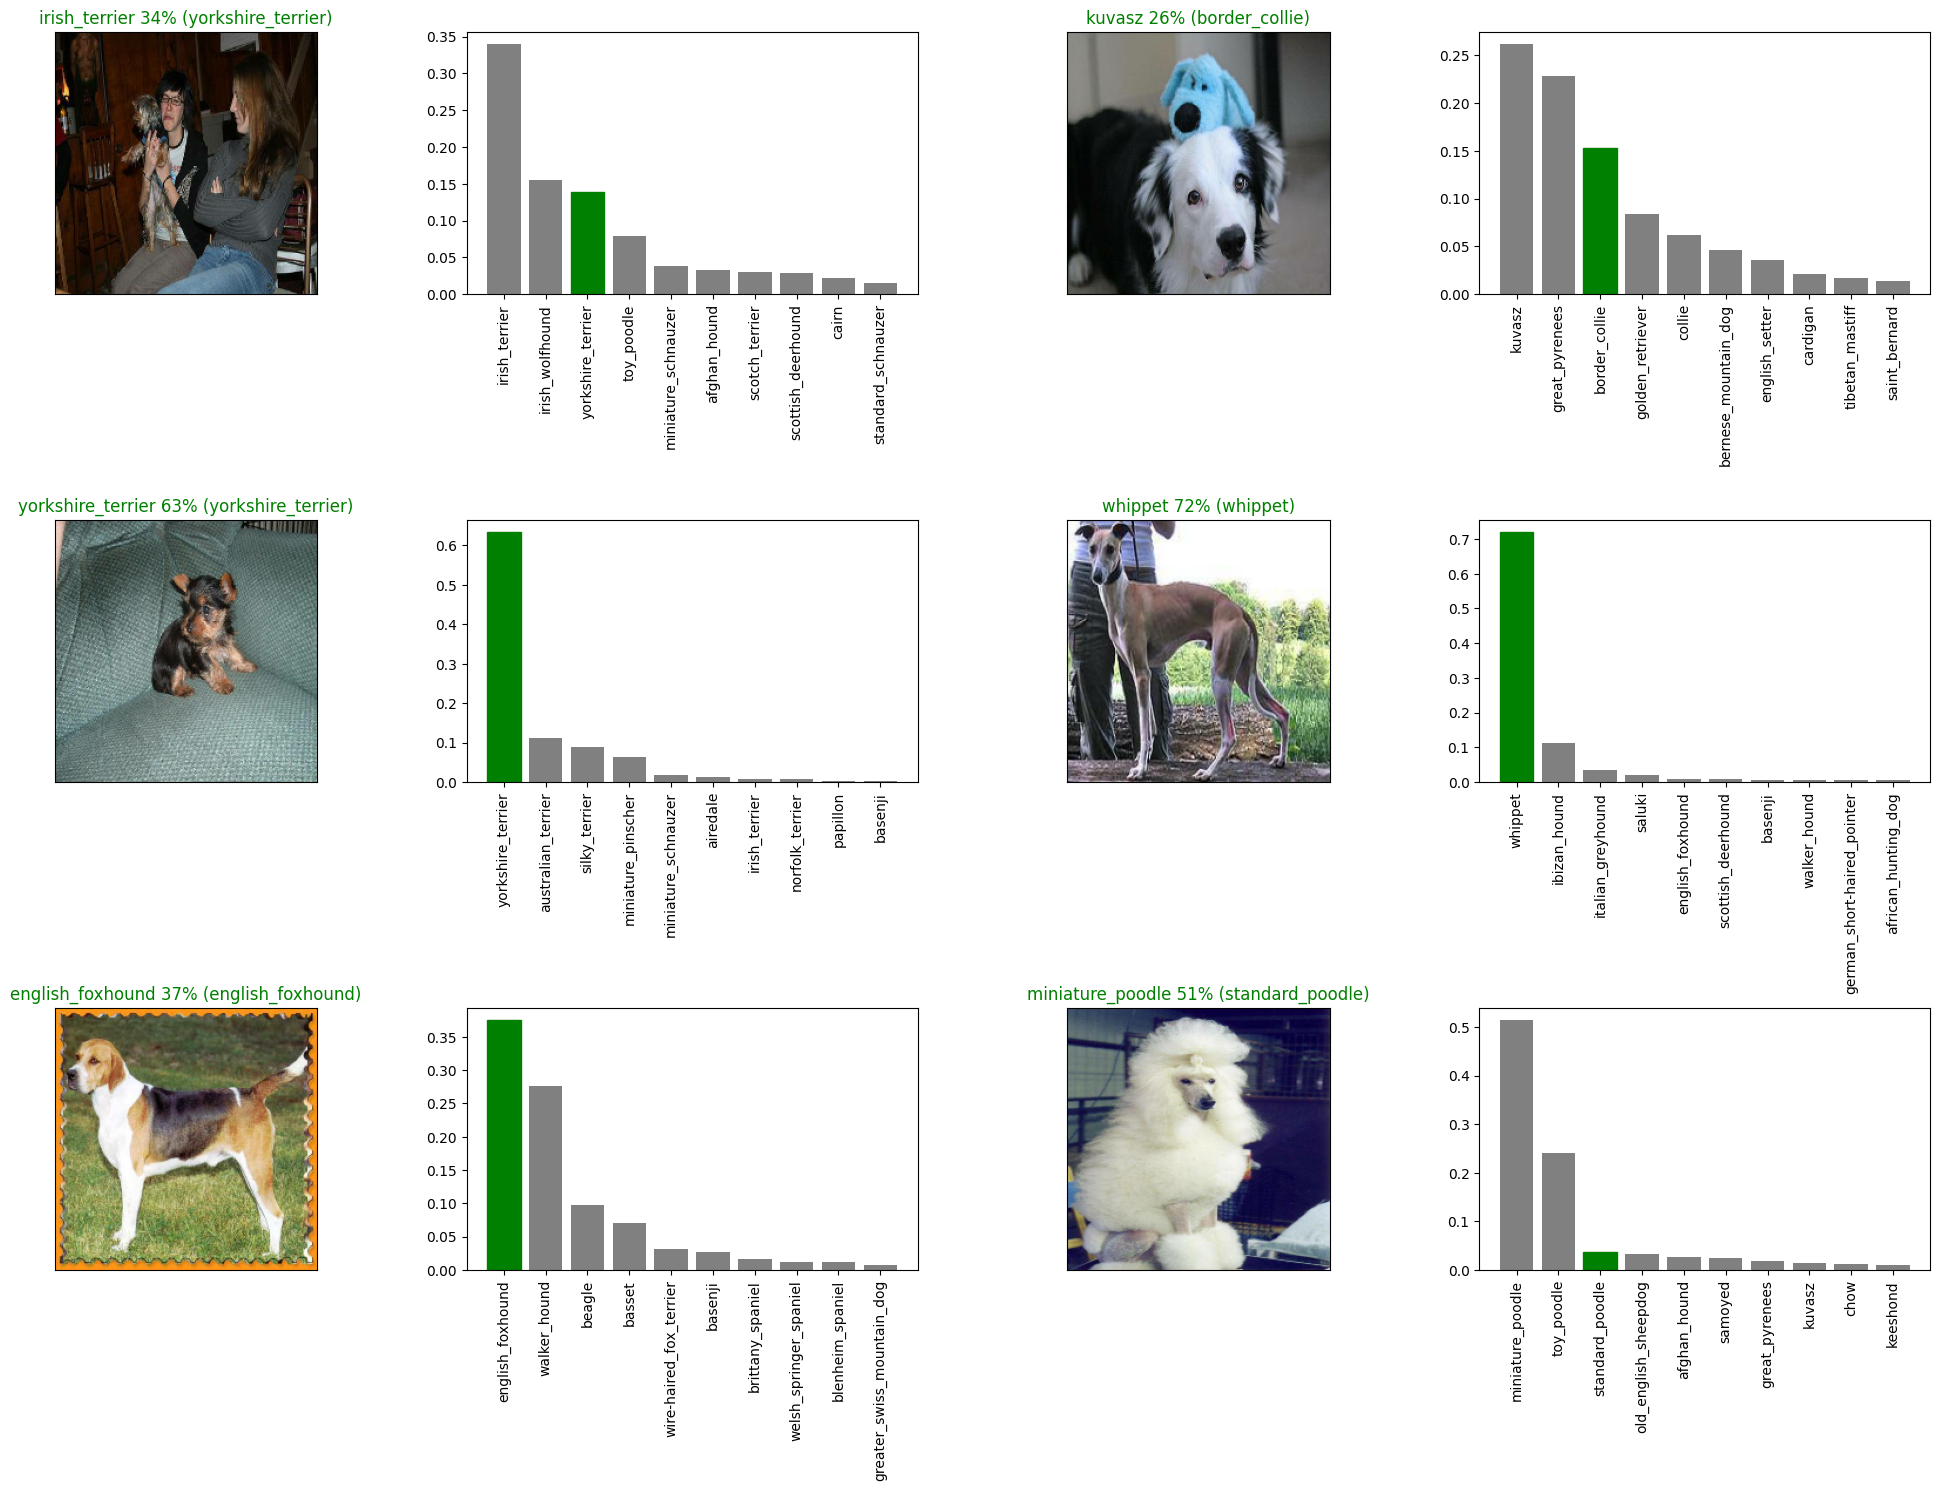

In [ ]:
# ======================================================================================================================================================
# Let's check a few predictions and their different values
i_multiplier = 10 #0-100-any
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## challenge
how would you create a confusion matrix with our models predictions and true labels?

# saving and reloading a trained model

In [ ]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("drive/MyDrive/vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
# load model function creation
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: drive/MyDrive/vision/models/20240712-05281720762123-1000-images-mobilenetv2-Adam.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'drive/MyDrive/vision/models/20240712-05281720762123-1000-images-mobilenetv2-Adam.h5'

In [ ]:
# Load our model trained on 1000 images
model_1000_images = load_model('drive/MyDrive/vision/models/20240710-17531720633982-1000-images-mobilenetv2-Adam.h5')

Loading saved model from: drive/MyDrive/vision/models/20240710-17531720633982-1000-images-mobilenetv2-Adam.h5


In [ ]:
# ----------------------------------------------------------------------------------------------
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 142ms/step - loss: 1.2378 - accuracy: 0.6900


[1.237849473953247, 0.6899999976158142]

In [ ]:

# Evaluate the loaded model
model_1000_images.evaluate(val_data)

7/7 [==============================] - 2s 156ms/step - loss: 1.1374 - accuracy: 0.7500


[1.1374313831329346, 0.75]

# # Training a big dog model (on full data)

In [ ]:
len(X), len(y) #X is file name, y are labels

(10222, 10222)

In [ ]:
X[:10]

['drive/MyDrive/vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
X_train[:10]

['drive/MyDrive/vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
 'drive/MyDrive/vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
 'drive/MyDrive/vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
 'drive/MyDrive/vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
 'drive/MyDrive/vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg',
 'drive/MyDrive/vision/train/0ea5759640f2e1c2d1a06adaf8a54ca7.jpg',
 'drive/MyDrive/vision/train/03e1d2ee5fd90aef036c90a9e7f81177.jpg',
 'drive/MyDrive/vision/train/16941a6728ddb9cb7423a6cc97fbe071.jpg',
 'drive/MyDrive/vision/train/0bedbecd92390ef9f4f7c8b06a629340.jpg',
 'drive/MyDrive/vision/train/143b9484273e57668d03bfc26755810a.jpg']

In [ ]:
len(X_train)

800

In [ ]:
y[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

## Create a data batch with full data set

In [ ]:
# Turn full training data in a data batch
full_data = create_data_batches(X, y)

Creating training data batches...


In [ ]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# create a new model for training on the full dataset
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4


In [ ]:
# Create full model callbacks

# TensorBoard callback
full_model_tensorboard = create_tensorboard_callback()

# Early stopping callback
# Note: No validation set when training on all the data, therefore can't monitor validation accruacy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [ ]:
# --------------------------------------------------------------------------------------------------------------------------
# Fit the full model to the full training data
#full_model.fit(x=full_data,
#               epochs=NUM_EPOCH,
#               callbacks=[full_model_tensorboard,
#                          full_model_early_stopping])

In [ ]:
# Save the model in the recommended Keras format
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

Saving model to: drive/MyDrive/vision/models/20240712-05281720762133-full-image-set-mobilenetv2-Adam.h5...


'drive/MyDrive/vision/models/20240712-05281720762133-full-image-set-mobilenetv2-Adam.h5'

In [ ]:
loaded_full_model = load_model('drive/MyDrive/vision/models/20240711-07391720683542-full-image-set-mobilenetv2-Adam.h5')


Loading saved model from: drive/MyDrive/vision/models/20240711-07391720683542-full-image-set-mobilenetv2-Adam.h5


# Making predictions on the test dataset

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we created create_data_batches() earlier which can take a list of filenames as input and convert them into Tensor batches.

To make predictions on the test data, we'll:

* Get the test image filenames.
*  Convert the filenames into test data batches using create_data_batches() and setting the test_data parameter to True (since there are no labels with the test images).
* Make a predictions array by passing the test data batches to the predict() function.

In [ ]:
# Load test image filenames (since we're using os.listdir(), these already have .jpg)
test_path = "drive/MyDrive/vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]

['drive/MyDrive/vision/test/e2b808864a5253fd356a9032915447a1.jpg',
 'drive/MyDrive/vision/test/e15513ca7ebb4730731f34c25e906502.jpg',
 'drive/MyDrive/vision/test/dfc5d207b533d381045984a0a0adb23c.jpg',
 'drive/MyDrive/vision/test/e2f853c8345758faf5d9b2075f196fd3.jpg',
 'drive/MyDrive/vision/test/de3fbd6fb5444fcf14390ac90545c2f1.jpg',
 'drive/MyDrive/vision/test/e1fa4eb8a57184773ac11efe0de11e92.jpg',
 'drive/MyDrive/vision/test/e73d52671c56e1507fed58c4c287d5f1.jpg',
 'drive/MyDrive/vision/test/e1b0cbcf3235fe9a7b35c1652081ff8d.jpg',
 'drive/MyDrive/vision/test/e2c0a9f66153b81eb27bb1bceb8c18dd.jpg',
 'drive/MyDrive/vision/test/deb063345bf2b6752e2fe25cad096547.jpg']

In [ ]:
# How many test images are there?
len(test_filenames)

10357

In [ ]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [ ]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

**Note:** Since there are 10,000+ test images, making predictions could take a while, even on a GPU. So beware running the cell below may take up to an hour.

In [ ]:
# -------------------------------------------------------------------------------------
# Make predictions on test data batch using the loaded full model
#test_predictions = loaded_full_model.predict(test_data,
#                                             verbose=1)

In [ ]:
# --------------------------------------------------------------------------------------------------------------------
# save predictions (NumPy array) to csv file (for access later)
#np.savetxt("drive/MyDrive/vision/pred_arrays.csv",test_predictions,delimiter=",")

In [ ]:
# Load predictions from csv file
test_predictions = np.loadtxt("drive/MyDrive/vision/pred_arrays.csv",delimiter=",")

In [ ]:
test_predictions[:10]

array([[1.35112876e-09, 1.08896048e-08, 7.23369920e-10, ...,
        2.28004637e-07, 3.27172334e-09, 1.38926763e-08],
       [3.78022160e-05, 9.21520132e-06, 1.46216701e-08, ...,
        9.28852160e-08, 3.25137279e-07, 5.28761435e-09],
       [1.23070185e-12, 1.52778113e-13, 4.50066068e-10, ...,
        1.84109759e-11, 2.41905454e-13, 4.39386212e-14],
       ...,
       [2.75749585e-07, 3.49485740e-13, 1.00256310e-08, ...,
        2.28346653e-09, 1.70106052e-12, 1.32737033e-11],
       [4.13633749e-09, 1.37277550e-06, 2.16609465e-07, ...,
        2.59031594e-07, 1.70385806e-06, 1.78269204e-07],
       [3.57234939e-07, 3.41575287e-07, 1.54435043e-07, ...,
        1.01184805e-09, 2.71783642e-06, 2.58899038e-03]])

In [ ]:
test_predictions.shape

(10357, 120)

## preparing test dataset predictions for kaggle
Looking at the Kaggle sample submission, it looks like they want the models output probabilities each for label along with the image ID's.

https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

To get the data in this format, we'll:

* Create a pandas DataFrame with an ID column as well as a column for each dog breed.
* Add data to the ID column by extracting the test image ID's from their filepaths.
* Add data (the prediction probabilities) to each of the dog breed columns using the unique_breeds list and the test_predictions list.
* Export the DataFrame as a CSV to submit it to Kaggle.

In [ ]:
# Create pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

In [ ]:
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids

In [ ]:
preds_df.head()

In [ ]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

In [ ]:
# Append test image ID's to predictions DataFrame
#test_path = "drive/MyDrive/vision/test/"
#preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
#preds_df.head()

In [ ]:
# save predition dataframe to csv for submission to kaggle
preds_df.to_csv("drive/MyDrive/vision/full_submission_1_mobilienetV2_adam.csv",
                 index=False)

In [ ]:
# /******************************************************************************

# Making predictions on custom images

To do so, we'll:

* Get the filepaths of our own images.
* Turn the filepaths into data batches using create_data_batches(). And since our custom images won't have labels, we set the test_data parameter to True.
* Pass the custom image data batch to our model's predict() method.
* Convert the prediction output probabilities to prediction labels.
* Compare the predicted labels to the custom images.

**Note:** To make predictions on custom images, I've uploaded pictures of my own to a directory located at drive/My Drive/Data/dogs/ (as seen in the cell below). In order to make predictions on your own images, you will have to do something similar.

In [ ]:
# Get custom image filepaths
custom_path = "drive/MyDrive/vision/dogg/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
custom_image_paths

['drive/MyDrive/vision/dogg/images.jfif',
 'drive/MyDrive/vision/dogg/images (1).jfif',
 'drive/MyDrive/vision/dogg/images (2).jfif',
 'drive/MyDrive/vision/dogg/imagesGR.jfif']

In [ ]:
os.listdir(custom_path)

['images.jfif', 'images (1).jfif', 'images (2).jfif']

In [ ]:
# Turn custom image into batch (set to test data because there are no labels)
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches...


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 2s 2s/step


In [ ]:
custom_preds.shape

(4, 120)

In [ ]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['border_collie', 'basset', 'basenji', 'golden_retriever']

In [ ]:
# Get custom images (our unbatchify() function won't work since there aren't labels)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

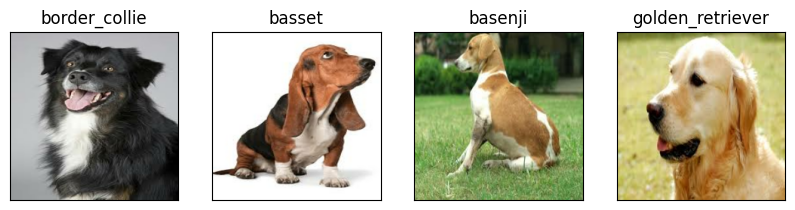

In [ ]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 4, i+1) #(row,column,steps)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)

**Trying another model from TensorFlow Hub** - Perhaps a different model would perform better on our dataset. One option would be to experiment with a different pre-trained model from TensorFlow Hub or look into the tf.keras.applications module.

**Data augmentation** - Take the training images and manipulate (crop, resize) or distort them (flip, rotate) to create even more training data for the model to learn from. Check out the TensorFlow images documentation for a whole bunch of functions you can use on images. A great idea would be to try and replicate the techniques in this example cat vs. dog image classification notebook for our dog breeds problem.

**Fine-tuning** - The model we used in this notebook was directly from TensorFlow Hub, we took what it had already learned from another dataset (ImageNet) and applied it to our own. Another option is to use what the model already knows and fine-tune this knowledge to our own dataset (pictures of dogs). This would mean all of the patterns within the model would be updated to be more specific to pictures of dogs rather than general images.


Q1) "How to improve a TensorFlow 2.x image classification model?"

Q2) "TensorFlow 2.x image classification best practices"

Q3) "Transfer learning for image classification with TensorFlow 2.x"

Q4) "Deep learning project examples with TensorFlow 2.x"